In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
df = pd.read_csv('./imdb.csv')
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


# 1. What's the probability that a movie was longer than an hour and a half? Two hours?

## hour and a half

In [3]:
dur_hour_and_half = df[df['duration'] > 90]
perc_one = dur_hour_and_half.count() / df.count()
perc_one['duration']

0.810461416070008

## two hours

In [55]:
dur_two_hours = df[df['duration'] > 120]
perc_two = dur_two_hours.count() / df.count()
perc_two['duration']

0.21221161495624502

# 2. What's the probability that a movie was directed by Steven Spielberg?

In [5]:
dir_steve = df[df['director_name'] == 'Steven Spielberg']
perc_three = dir_steve.count() / df.count()
perc_three['director_name']

0.005264223527029763

# 3. What's the probability that a movie directed by Clint Eastwood will gross under budget?

In [6]:
dir_clint = df[df['director_name'] == 'Clint Eastwood']
perc_four = dir_clint[dir_clint['gross'] < dir_clint['budget']].count() / dir_clint.count()
perc_four['gross']

0.3684210526315789

# 4. What's the probability that a movie generally grossed more than its budget?

In [7]:
perc_five = df[df['gross'] > df['budget']].count() / df.count()
perc_five['gross']

0.4929069487857658

# 5. What's the probability that a movie grossed over the average gross of this data set?

In [8]:
perc_six = df[df['gross'] > df['gross'].mean()].count() / df.count()
perc_six['gross']

0.31882664101947583

# 6. For ratings we'll consider a movie with at least a 6/10 to be worth renting, if not seeing in theaters. A false positive would be a movie that was highly-rated but did poorly in the box office (gross < budget). A false negative would be a movie that was poorly-rated but did great in the box office (gross < budget).

# 7. In the IMDB dataset, what are the false positive and false negative rates? Can you provide some examples of each?

In [9]:
false_positive = df[(df['imdb_score'] > 6) & (df['gross'] < df['budget'])]
perc_seven = false_positive.count() / df.count()
perc_seven['gross']

0.27987496994469824

In [10]:
false_negative = df[(df['imdb_score'] < 6) & (df['gross'] > df['budget'])]
perc_eight = false_negative.count() / df.count()
perc_eight['gross']

0.11204616494349603

# 8. If I’m a production studio exec and Tom Hanks is starring in my movie but I’m feeling uncertain about whether we should keep him (will he make as much money as we want?), tell me should I keep him in the movie or switch him out for Harrison Ford?

In [57]:
actor_tom = df[df['actor_1_name'] == 'Tom Hanks']
perc_nine = actor_tom[actor_tom['gross'] > actor_tom['budget']].count() / actor_tom.count()
perc_nine['gross']

0.7916666666666666

In [12]:
actor_ford = df[df['actor_1_name'] == 'Harrison Ford']
perc_ten = actor_ford[actor_ford['gross'] > actor_ford['budget']].count() / actor_ford.count()
perc_ten['gross']

0.72

### I'd go with Ford, but if you're a baby and want to look at statistics than choose Tom because he has a higher percentage of films where gross is higher than budget.

# 9. Same as above, but I’m judging on the ratings of the movie instead of the gross/budget.

In [13]:
perc_eleven = actor_tom[actor_tom['imdb_score'] > 6].count() / actor_tom.count()
perc_eleven['imdb_score']

1.0

In [14]:
perc_twelve = actor_ford[actor_ford['imdb_score'] > 6].count() / actor_ford.count()
perc_twelve['imdb_score']

0.8888888888888888

### Again Tom wins on ratings.

# 10. What’s the probability that a movie’s length will be between 1hr 10mins and 1h 30mins?

In [15]:
hour_ten_and_half = df[(df['duration'] > 70) & (df['duration'] < 90)]
perc_thirteen = hour_ten_and_half.count() / df.count()
perc_thirteen['duration']

0.1322593476531424

# 11. How does the distribution of movie budgets compare to the movie gross values?

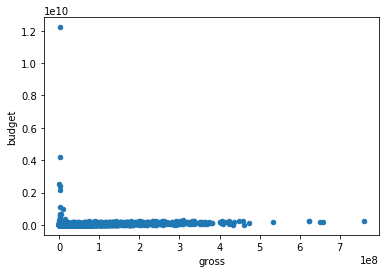

In [25]:
df[['budget','gross']].plot(kind='scatter',x='gross', y='budget')

# 12. Which genre trends toward the highest gross-to-budget ratio? You may have to do some extra parsing to answer this question.

### Executive order from Scott: Don't do this question

# 13. Nicolas Cage is known for starring in some pretty bad movies. Are his movies statistically significantly worse (i.e. in rating) than the rest of the IMDB 5000+?

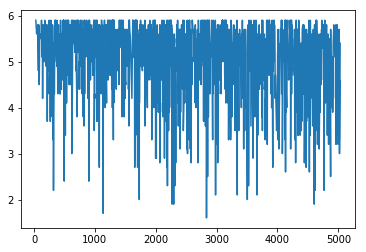

In [53]:
bad_movies = df[df['imdb_score'] < 6]['imdb_score'].plot()

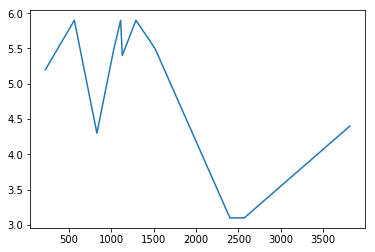

In [52]:
actor_nic = df[(df['actor_1_name'] == 'Nicolas Cage') & (df['imdb_score'] < 6)]['imdb_score'].plot()

### Not significantly, Cages lowest score is a 3 while there are many other movies far below 3 and 2.

# 14. Have any years grossed a statistically-significant higher amount than the other years?

In [59]:
movies_by_year = df[['gross', 'title_year']].groupby(df['title_year']).sum()
pd.DataFrame(movies_by_year['gross']).sort_values('gross', ascending=False)

,gross
title_year,
2012.0,1.138011e+10
2013.0,1.050161e+10
2014.0,1.042283e+10
2009.0,9.934600e+09
2010.0,9.931757e+09
2015.0,9.513928e+09
2008.0,8.959275e+09
2011.0,8.745095e+09
2002.0,8.702230e+09


### Pretty big jump from 1989 into 1990